In [3]:
import pandas as pd
import pickle
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import json

### In this lab, we will be dealing with interaction networks. We will use data publicly available from reddit forums. 

#### The objective in this lab is to analyze graphs for understanding how interactions as features can be used for predictive applications. We will look at the following:
    
- Analyze the reply networks of reddit forums
- Structural analysis of the interaction directed networks
- Analyze the significance of users and do some preliminary graph analysis based on the folowing:
    -  Degree distribution
    -  Degree centrality
    -  Betweenness centrality
    -  community detection (supplementary)


In [4]:
# 11 monthly interaction networks

edge_monthly = []
with open('./AndroidQuestions.json') as json_file:  
    data = json.load(json_file)
    
    for month in range(len(data)):
        edges = []

        adj_list_curr = data[month]
        
        for key in adj_list_curr:
            for nbrs in adj_list_curr[key]:
                edges.append((key, nbrs))
        
        G = nx.DiGraph()
        G.add_edges_from(edges)

        print(nx.number_of_nodes(G), nx.number_of_edges(G))
        
        edge_monthly.append(edges)

(1398, 2211)
(1299, 2058)
(1386, 2340)
(1305, 2128)
(1440, 2268)
(1706, 2835)
(1805, 3015)
(1799, 2984)
(1693, 2714)
(1812, 2961)
(1875, 3143)


In [5]:
edge_monthly = []
with open('./PoliticalDiscussion.json') as json_file:  
    data = json.load(json_file)
    
    for month in range(len(data)):
        edges = []

        adj_list_curr = data[month]
        
        for key in adj_list_curr:
            for nbrs in adj_list_curr[key]:
                edges.append((key, nbrs))
        
        G = nx.DiGraph()
        G.add_edges_from(edges)

        print(nx.number_of_nodes(G), nx.number_of_edges(G))
        
        edge_monthly.append(edges)

(2171, 10037)
(2071, 9368)
(2056, 9733)
(1797, 8169)
(2065, 8911)
(1921, 9051)
(1893, 8482)
(1858, 6896)
(1678, 6886)
(1712, 8204)
(2039, 9697)


### Graph Analysis

##### Some of the graph statistics to check for each month:
        - Average degree 
        - Diameter of the network 
        - Graph density
        - Community detection modularity change

In [9]:
def computeInDegree(G):
    return  G.in_degree

def computeOutDegree(G):
    return  G.out_degree

In [10]:
def log_logPlot(data, savedir, title=''):
    value_list = []
    
    for u, deg in data:
        value_list.append(deg)
        
    sorted_X = sorted(set(value_list))
#     print(data)

    distributionX = [value_list.count(x) for x in sorted_X]
    plt.figure()
    plt.loglog(sorted_X, distributionX, 'ro', basex=2, basey=2)
    # plt.xlim([])
    plt.xlabel('Degree', size=20)
    plt.ylabel('Number of nodes', size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.title(title, size=25)
    plt.xlim([0, np.power(2, 10)])
#     plt.savefig(savedir)

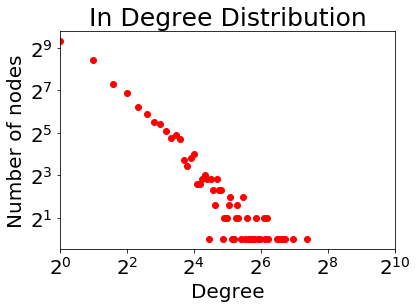

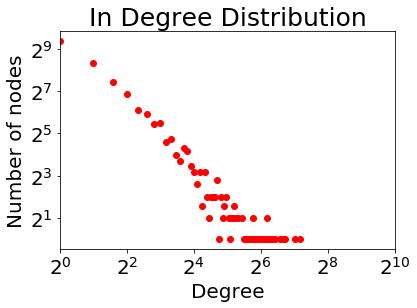

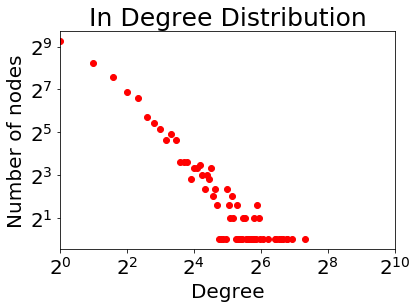

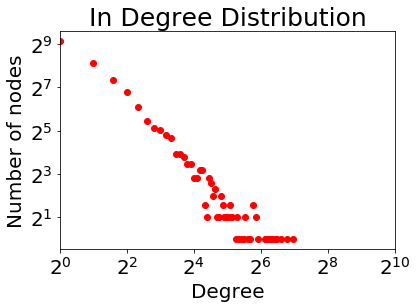

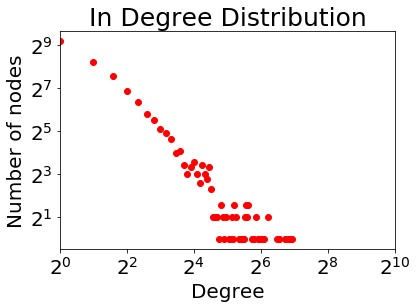

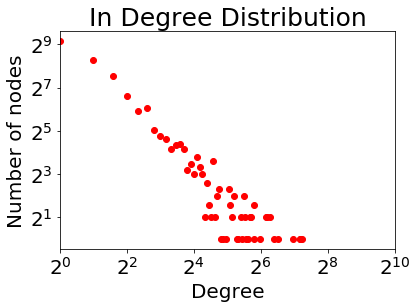

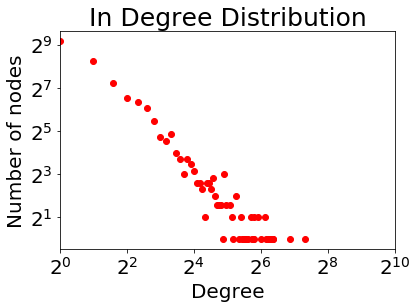

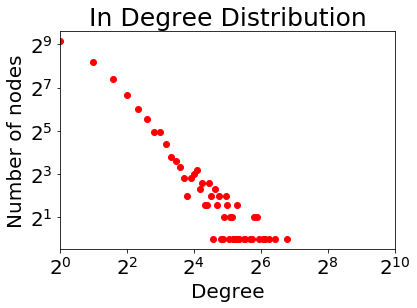

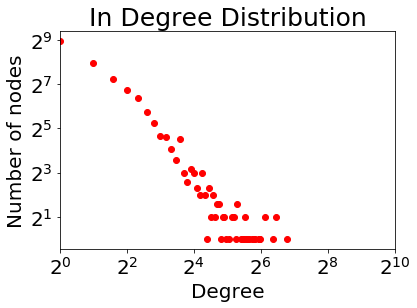

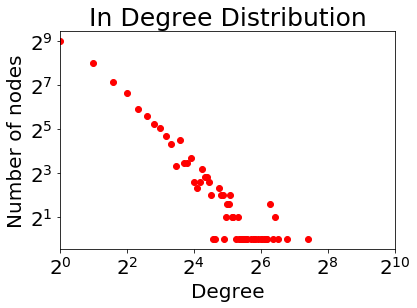

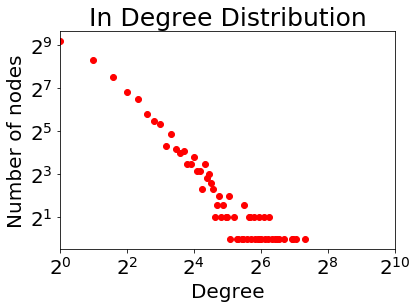

In [11]:
for eidx in range(len(edge_monthly)):
    edges = edge_monthly[eidx]
    
    G = nx.DiGraph()
    G.add_edges_from(edges)
    
    degreesDict = computeInDegree(G)

    
    log_logPlot(degreesDict, 'indeg_plots/indeg_' + str(eidx) +'.png', 'In Degree Distribution')
    
    

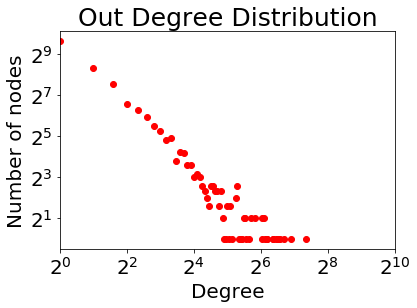

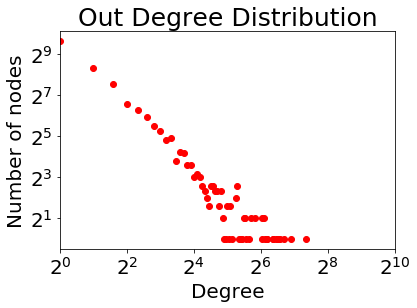

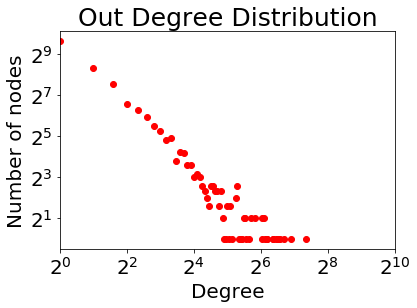

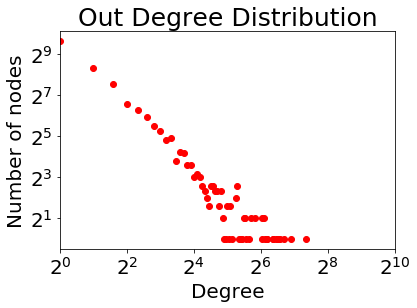

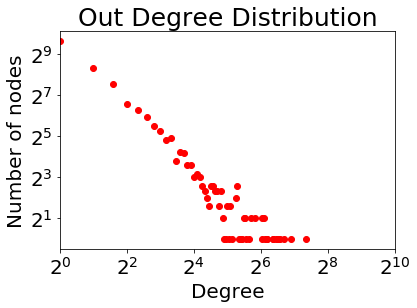

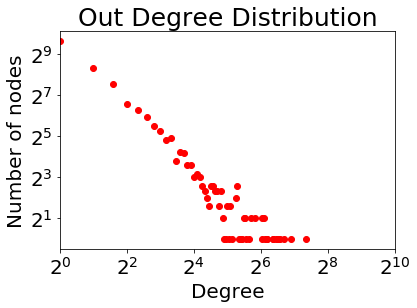

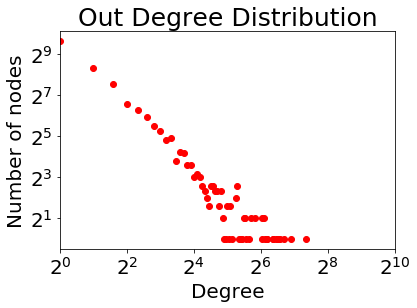

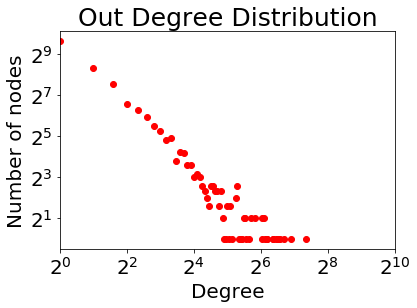

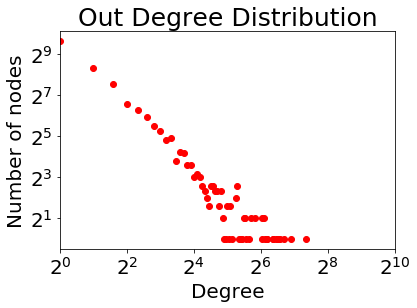

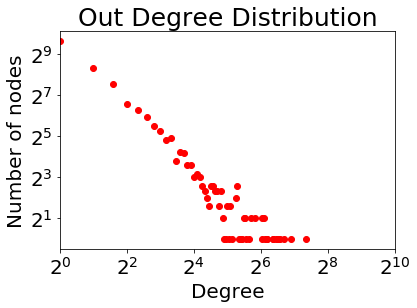

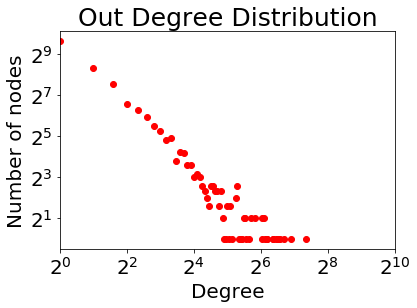

In [13]:
for eidx in range(len(edge_monthly)):
    edges = edge_monthly[eidx]
    

    degreesDict = computeOutDegree(G)
    log_logPlot(degreesDict, 'indeg_plots/outdeg_' + str(eidx) +'.png', 'Out Degree Distribution')


#### Visualize the graph (node size by in-degree)

In [ ]:
for eidx in range(len(edge_monthly)):
    edges = edge_monthly[eidx]
    print(len(edges))
    
    G = nx.DiGraph()
    G.add_edges_from(edges)
    
    degreesDict = computeInDegree(G)

    degDict = {}
    for node, deg in degreesDict:
        degDict[node] = deg
    
    size = [50 * degDict[node] for node in degDict]

    nx.draw_spring(G, node_size = size, with_labels = True, font_size = 5,
                   node_color = "#FFFFFF", edge_color = "#D4D5CE", alpha = .95)
    plt.savefig('netPlots/network_' + str(eidx) + '.png')
    plt.close()

10037


IOError: [Errno 2] No such file or directory: 'netPlots/network_0.png'

#### Store a dataframe with node centralities

We will merge the first 5 networks together

In [16]:
edges_merge = []
for idx in range(3):
    edges_merge.extend(edge_monthly[idx])


G = nx.DiGraph()
G.add_edges_from(edges_merge)

df_nodes = pd.DataFrame()


deg_centrality = nx.degree_centrality(G)
bet_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
           

rcount = 0
for node in deg_centrality:
    df_nodes.loc[rcount, 'node_id'] = node
    df_nodes.loc[rcount, 'indegree'] = G.in_degree(node)
    df_nodes.loc[rcount, 'outdegree'] = G.out_degree(node)
    df_nodes.loc[rcount, 'degree_cent'] = deg_centrality[node]
    df_nodes.loc[rcount, 'betweenness_cent'] = bet_centrality[node]
    df_nodes.loc[rcount, 'closeness_cent'] = closeness_centrality[node]

    rcount += 1

df_nodes.head()




,node_id,indegree,outdegree,degree_cent,betweenness_cent,closeness_cent
0,elonc,3.0,8.0,0.002632,0.000416,0.255813
1,shudmeyer,1.0,1.0,0.000478,0.000000,0.234736
2,misplaced_my_pants,1.0,1.0,0.000478,0.000000,0.000239
3,Popedizzle,0.0,1.0,0.000239,0.000000,0.000000
4,PoliceSquad,0.0,1.0,0.000239,0.000000,0.000000


In [84]:
df_nodes.to_csv('../../data/centrality_df.csv')

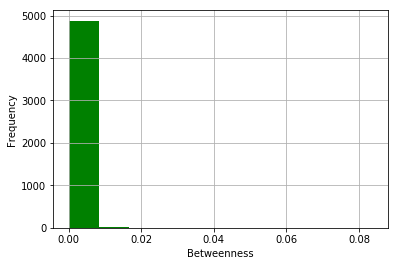

In [80]:
plt.figure()
n, bins, patches = plt.hist(df_nodes['betweenness_Cent'].tolist(), bins=10, facecolor='g')
plt.ylabel('Frequency')
plt.xlabel('Betweenness')
plt.title('')
plt.grid(True)
plt.show()

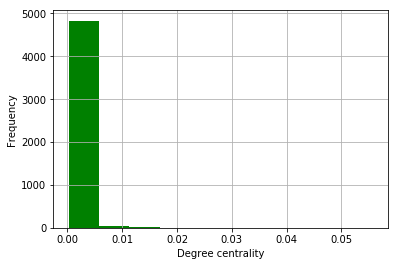

In [81]:
plt.figure()
n, bins, patches = plt.hist(df_nodes['degree_cent'].tolist(), bins=10, facecolor='g')
plt.ylabel('Frequency')
plt.xlabel('Degree centrality')
plt.title('')
plt.grid(True)
plt.show()

In [89]:
def plot_bar(labels, data):
    index = np.arange(len(labels))
    plt.bar(index, data)
#     plt.xlabel('', fontsize=5)
    plt.ylabel('Centrality', fontsize=5)
    plt.xticks(index, labels, fontsize=5, rotation=90)
    plt.title('')
    plt.show()

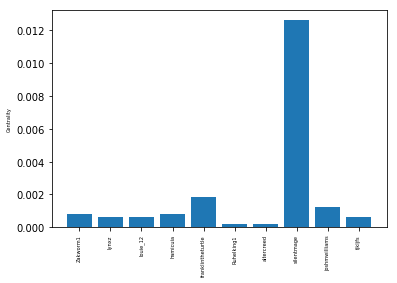

In [90]:
plot_bar((df_nodes['node_id'].tolist())[:10], (df_nodes['degree_cent'].tolist())[:10])

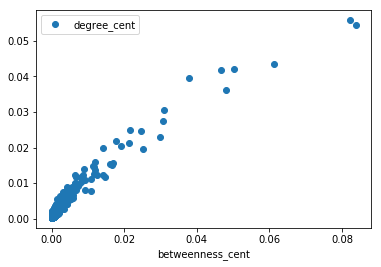

In [93]:
df_nodes.plot(x='betweenness_cent', y='degree_cent', style='o')

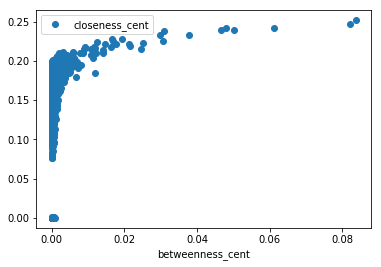

In [94]:
df_nodes.plot(x='betweenness_cent', y='closeness_cent', style='o')

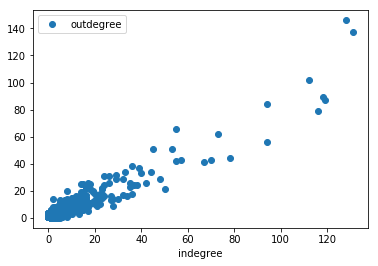

In [95]:
df_nodes.plot(x='indegree', y='outdegree', style='o')

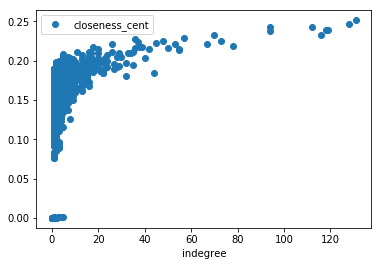

In [99]:
df_nodes.plot(x='indegree', y='closeness_cent', style='o')

### Community detection 

In [1]:
import community

In [6]:
edges_merge = []
for idx in range(5):
    edges_merge.extend(edge_monthly[idx])


G = nx.Graph()
G.add_edges_from(edges_merge)

partition = community.best_partition(G)
modularity = community.modularity(partition, G)
print('Modularity:', modularity)



Modularity: 0.6365476317687552


c:\python 3.5\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


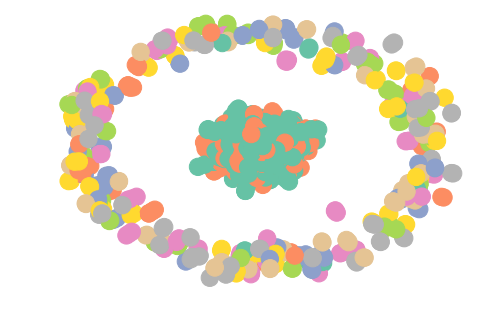

In [7]:
colors = [partition[n] for n in G.nodes()]
my_colors = plt.cm.Set2 # you can select other color pallettes here: https://matplotlib.org/users/colormaps.html
nx.draw(G, node_color=colors, cmap = my_colors, edge_color = "#D4D5CE")


### Exercise

##### Perform the following steps on the first 4 networks of the PoliticalDiscussion data:

1. Extract the top 10 nodes by in-degree from the merged graph
2. Report the betweenness, closeness, pagerank of those 10 nodes.
3. Remove these 10 nodes from the graph
4. Recompute the modularity and report it.